In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualise
import matplotlib.pyplot as plt

import pickle
import os

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
# import data
train_data = pd.read_csv("../data/MNIST/mnist_train.csv")
test_data = pd.read_csv("../data/MNIST/mnist_test.csv")

In [3]:
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x_train = train_data.drop(["label"], axis=1)
y_train = train_data["label"].array.reshape(-1,1)

x_test = test_data.drop(["label"], axis=1)
y_test = test_data["label"].array.reshape(-1,1)

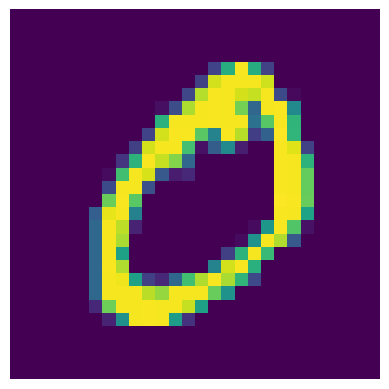

In [5]:
# visualise
img = x_train.iloc[1,:].array.reshape(28,28)
plt.imshow(img)
plt.axis("off")
plt.show()

In [81]:
x_train_sample = x_train[:300]
y_train_sample = y_train[:300]
x_test_sample = x_test[:100]
y_test_sample = y_test[:100]

# Convert y_train_sample and y_test_sample to DataFrames if they are not already
y_train_sample = pd.DataFrame(y_train_sample)  # Convert to DataFrame
y_test_sample = pd.DataFrame(y_test_sample)    # Convert to DataFrame

x_train_sample.to_csv('../data/MNIST/x_train_sample.csv', index=False)
y_train_sample.to_csv('../data/MNIST/y_train_sample.csv', index=False)

x_test_sample.to_csv('../data/MNIST/x_test_sample.csv', index=False)
y_test_sample.to_csv('../data/MNIST/y_test_sample.csv', index=False)

In [103]:
def save_images_from_csv(csv_path):
    """
    Reads pixel data from a CSV file, reshapes each row into a 28x28 image, and saves each image as a PNG in its own folder.
    
    Parameters:
    - csv_path (str): Path to the CSV file containing image data.
    """
    # Extract the base name of the CSV file (without extension) to use in the output folder name
    csv_name = os.path.splitext(os.path.basename(csv_path))[0]
    output_folder = f"../data/MNIST/{csv_name}"  # Define output folder based on CSV name
    
    # Step 1: Create a main folder to store images
    os.makedirs(output_folder, exist_ok=True)

    # Step 2: Read the CSV file
    data = pd.read_csv(csv_path)

    # Step 3: Iterate over each row, reshape it, and save as an image
    for i in range(len(data)):
        img_data = data.iloc[i, :].values.reshape(28, 28)
        plt.imshow(img_data, cmap='gray')
        plt.axis('off')  # Turn off axis

        # Create a folder for each image using its filename (subfolder under the main output folder)
        img_folder = os.path.join(output_folder, f"image_{i+1}")
        os.makedirs(img_folder, exist_ok=True)

        # Step 4: Save the image in the corresponding folder
        img_filename = os.path.join(img_folder, f"image_{i+1}.JPEG")
        plt.savefig(img_filename, bbox_inches='tight', pad_inches=0)
        plt.close()  # Close the plot to avoid displaying it in the notebook

    print(f"All images saved in '{output_folder}' folder, with individual folders for each image.")

In [108]:
save_images_from_csv("../data/MNIST/x_train_sample.csv")
save_images_from_csv("../data/MNIST/x_test_sample.csv")

All images saved in '../data/MNIST/x_train_sample' folder, with individual folders for each image.
All images saved in '../data/MNIST/x_test_sample' folder, with individual folders for each image.


In [140]:
def create_wnid_to_label_pickle(output_folder, csv_path):
    """
    Creates a mapping of image filenames to labels and saves it as a pickle file.
    
    Parameters:
    - output_folder (str): The folder where the images are stored.
    - y_train_sample (DataFrame): DataFrame containing labels for the images.
    """
    # Create a dictionary to hold the image name to label mapping
    wnid_to_label = {}
    
    labels = pd.read_csv(csv_path)
    
    if 'train' in csv_path:
        # Iterate through the DataFrame and create the mapping
        for i in range(len(labels)):
            # Construct the image filename based on the image index
            img_filename = f"image_{i+1}"  # Adjust the path if necessary
            label = labels.iloc[i, 0]  # Assuming labels are in the first column

            # Store the mapping
            wnid_to_label[img_filename] = label

        # Define the pickle file path
        pickle_file_path = os.path.join(output_folder, "wnid_to_label.pickle")

        # Save the mapping to a pickle file
        with open(pickle_file_path, 'wb') as file:
            pickle.dump(wnid_to_label, file)

        print(f"Mapping saved to '{pickle_file_path}'.")
    elif 'test' in csv_path:
        # Iterate through the DataFrame and create the mapping
        for i in range(len(labels)):
            # Construct the image filename based on the image index
            img_filename = f"image_{i+1}"  # Adjust the path if necessary
            label = labels.iloc[i, 0]  # Assuming labels are in the first column

            # Store the mapping
            wnid_to_label[img_filename] = label

        # Define the pickle file path
        pickle_file_path = os.path.join(output_folder, "wnid_to_label_test.pickle")

        # Save the mapping to a pickle file
        with open(pickle_file_path, 'wb') as file:
            pickle.dump(wnid_to_label, file)

        print(f"Mapping saved to '{pickle_file_path}'.")

In [141]:
create_wnid_to_label_pickle("../data/MNIST", "../data/MNIST/y_test_sample.csv")

Mapping saved to '../data/MNIST/wnid_to_label_test.pickle'.


In [106]:
create_wnid_to_label_pickle("../data/MNIST", "../data/MNIST/y_train_sample.csv")

Mapping saved to '../data/MNIST/wnid_to_label.pickle'.


In [11]:
with open('../data/MNIST/wnid_to_label.pickle', 'rb') as file:
    wnid_to_label = pickle.load(file)
wnid_to_label

{'image_1': 5,
 'image_2': 0,
 'image_3': 4,
 'image_4': 1,
 'image_5': 9,
 'image_6': 2,
 'image_7': 1,
 'image_8': 3,
 'image_9': 1,
 'image_10': 4,
 'image_11': 3,
 'image_12': 5,
 'image_13': 3,
 'image_14': 6,
 'image_15': 1,
 'image_16': 7,
 'image_17': 2,
 'image_18': 8,
 'image_19': 6,
 'image_20': 9,
 'image_21': 4,
 'image_22': 0,
 'image_23': 9,
 'image_24': 1,
 'image_25': 1,
 'image_26': 2,
 'image_27': 4,
 'image_28': 3,
 'image_29': 2,
 'image_30': 7,
 'image_31': 3,
 'image_32': 8,
 'image_33': 6,
 'image_34': 9,
 'image_35': 0,
 'image_36': 5,
 'image_37': 6,
 'image_38': 0,
 'image_39': 7,
 'image_40': 6,
 'image_41': 1,
 'image_42': 8,
 'image_43': 7,
 'image_44': 9,
 'image_45': 3,
 'image_46': 9,
 'image_47': 8,
 'image_48': 5,
 'image_49': 9,
 'image_50': 3,
 'image_51': 3,
 'image_52': 0,
 'image_53': 7,
 'image_54': 4,
 'image_55': 9,
 'image_56': 8,
 'image_57': 0,
 'image_58': 9,
 'image_59': 4,
 'image_60': 1,
 'image_61': 4,
 'image_62': 4,
 'image_63': 6,
 

In [84]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import numpy as np
from PIL import Image
import random
import os
import glob
import re
import pickle
from utils import parse_imagenet_val_labels

In [25]:
def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

g = torch.Generator()
g.manual_seed(0)
# use above function and g to preserve reproducibility.

In [131]:
def data_loader(ds_name, batch_size, num_workers): 
    """
    Prepare data loaders
    """
    if ds_name == 'MNIST':
        data_dir = '../data/MNIST'
        if not os.path.isdir(data_dir):
            raise Exception('Please download MNIST dataset!')       
        transform = transforms.Compose([
            transforms.Grayscale(num_output_channels=1),
            transforms.Resize((28, 28)),
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
        ])
        
        train_ds = torchvision.datasets.ImageFolder(os.path.join(data_dir, 'x_train_sample'), transform=transform)
        test_ds = torchvision.datasets.ImageFolder(os.path.join(data_dir, 'x_test_sample'), transform=transform)
        
        train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True,
                              num_workers=num_workers, worker_init_fn=seed_worker, generator=g)
        test_dl = DataLoader(test_ds, batch_size=min(batch_size, 1024), shuffle=False,
                             num_workers=num_workers)
    return train_dl, test_dl 

In [129]:
data_loader('MNIST', 4, 2)

(<torch.utils.data.dataloader.DataLoader at 0x2d94733d0>,
 <torch.utils.data.dataloader.DataLoader at 0x2d93ebed0>)